In [1]:
import pandas as pd

# Assignment 1: Date Formats and Date Parts

* First, convert the `date` column to datetime64, by any method.

* Then, create a column representing the time difference between the last date in the data and each date. 

* Next, create columns for the date parts year, month, and weekday.

* Finally, format the date to Year-Month-Day (This will be a string/object).

In [10]:
# read in transactions.csv 
transactions = pd.read_csv('../retail/transactions.csv', parse_dates=["date"])
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [36]:
last_date = transactions.date.max()
transactions['delta'] = last_date - transactions['date']

transactions.head()

,date,store_nbr,transactions,delta,year,month,weekday,formatted_date
0,2013-01-01,25,770,1687 days,2013,1,1,2013-01-01
1,2013-01-02,1,2111,1686 days,2013,1,2,2013-01-02
2,2013-01-02,2,2358,1686 days,2013,1,2,2013-01-02
3,2013-01-02,3,3487,1686 days,2013,1,2,2013-01-02
4,2013-01-02,4,1922,1686 days,2013,1,2,2013-01-02


In [37]:
transactions['year'] = transactions['date'].dt.year
transactions['month'] = transactions['date'].dt.month
transactions['weekday'] = transactions['date'].dt.weekday

transactions.head()

,date,store_nbr,transactions,delta,year,month,weekday,formatted_date
0,2013-01-01,25,770,1687 days,2013,1,1,2013-01-01
1,2013-01-02,1,2111,1686 days,2013,1,2,2013-01-02
2,2013-01-02,2,2358,1686 days,2013,1,2,2013-01-02
3,2013-01-02,3,3487,1686 days,2013,1,2,2013-01-02
4,2013-01-02,4,1922,1686 days,2013,1,2,2013-01-02


In [46]:
from datetime import datetime
now = datetime.now()
transactions['formatted_date'] = transactions['date'].dt.strftime("%Y-%B-%d")

transactions.head()
# datetime.now()

,date,store_nbr,transactions,delta,year,month,weekday,formatted_date
0,2013-01-01,25,770,1687 days,2013,1,1,2013-January-01
1,2013-01-02,1,2111,1686 days,2013,1,2,2013-January-02
2,2013-01-02,2,2358,1686 days,2013,1,2,2013-January-02
3,2013-01-02,3,3487,1686 days,2013,1,2,2013-January-02
4,2013-01-02,4,1922,1686 days,2013,1,2,2013-January-02


# Assignment 2: Time Arithmetic


Hi again,

I just got word the the true max date in our data was three weeks after 2017-08-15.

* Can you add three weeks to the ‘time_to_last_date’ column? 
* Then, calculate ‘weeks_to_last_date’ by dividing the number of days  in ‘time_to_last_date’ by 7.

Thanks

In [49]:
# overwrite previous transactions df and convert date column

transactions = pd.read_csv("../retail/transactions.csv", parse_dates=["date"])
last_date = transactions.date.max()
transactions['time_to_last_date'] = (last_date + pd.to_timedelta(3, unit='W') - transactions['date'])
transactions.head()

,date,store_nbr,transactions,time_to_last_date
0,2013-01-01,25,770,1708 days
1,2013-01-02,1,2111,1707 days
2,2013-01-02,2,2358,1707 days
3,2013-01-02,3,3487,1707 days
4,2013-01-02,4,1922,1707 days


In [55]:
transactions['weeks_to_last_date'] = transactions['time_to_last_date'] / pd.to_timedelta(7, unit="D")
transactions.head()

,date,store_nbr,transactions,time_to_last_date,weeks_to_last_date
0,2013-01-01,25,770,1708 days,244.000000
1,2013-01-02,1,2111,1707 days,243.857143
2,2013-01-02,2,2358,1707 days,243.857143
3,2013-01-02,3,3487,1707 days,243.857143
4,2013-01-02,4,1922,1707 days,243.857143


In [ ]:
# recreate columns from assignment 1 using assign

transactions = transactions.assign(
    year=transactions["date"].dt.year,
    month=transactions["date"].dt.month,
    day_of_week=transactions["date"].dt.dayofweek,
    time_to_last_date=transactions["date"].max() - transactions["date"],
)

transactions.head()

# Assignment 3: Missing Time Series Data

Take a look at the mean value for the oil price using forward fill, backfill, and interpolation. Are they very different?

Then, plot the series with forward fill for:
 * The year 2014.
 * The month of December 2014.
 * The days from December 1st to December 15th, 2014.


In [ ]:
# Read in oil csv with date as index (and converted to datetime64)
oil = pd.read_csv("../retail/oil.csv", 
                  index_col="date", 
                  parse_dates=True)



In [52]:
# This is a synonym for datetime64

oil.index.dtype

dtype('<M8[ns]')

In [53]:
# mean of original series

oil.mean()

dcoilwtico    67.714366
dtype: float64

<Axes: xlabel='date'>

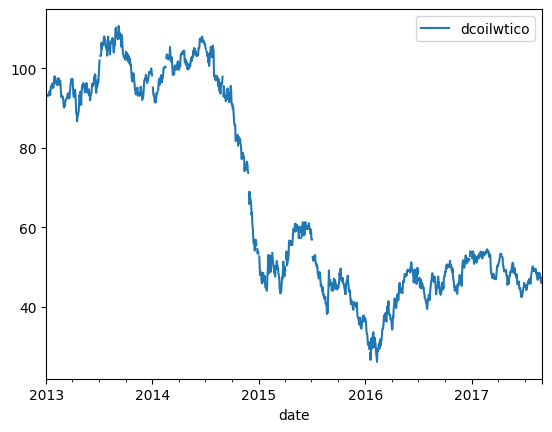

In [54]:
# original plot

oil.plot()

<Axes: xlabel='date'>

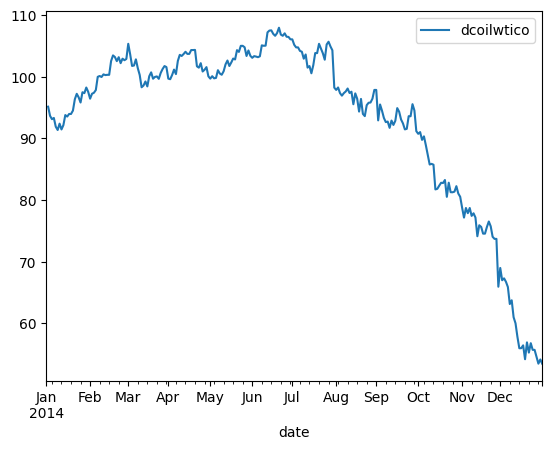

In [59]:
oil.loc['2014'].ffill().plot()

<Axes: xlabel='date'>

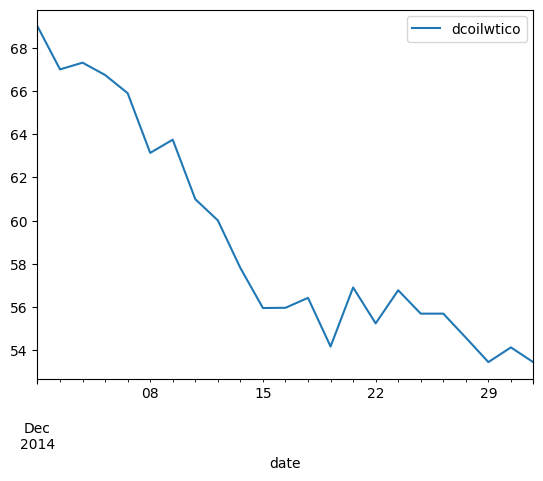

In [60]:
oil.loc['2014-12'].ffill().plot()

<Axes: xlabel='date'>

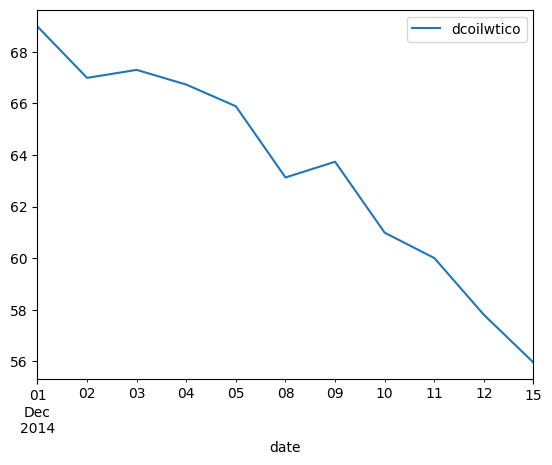

In [61]:
oil.loc['2014-12-01':'2014-12-15'].ffill().plot()

In [69]:
oil.mean(), oil.ffill().mean(), oil.bfill().mean(), oil.interpolate().mean()

(dcoilwtico    67.714366
 dtype: float64,
 dcoilwtico    67.671249
 dtype: float64,
 dcoilwtico    67.673325
 dtype: float64,
 dcoilwtico    67.661824
 dtype: float64)

# Assignment 4: Shift and Diff

Hello,
I’m looking into a few different year over year trends related to changes made at store 47.

Can you plot the sum of monthly of transactions in year 2015 vs the sum of monthly transactions in the year prior for store 47?

Make sure to group your DataFrame by year AND month!

Thanks

<Axes: title={'center': 'Store 47 monthly sales diff 2014-2015'}, xlabel='Month', ylabel='Diff since 2014'>

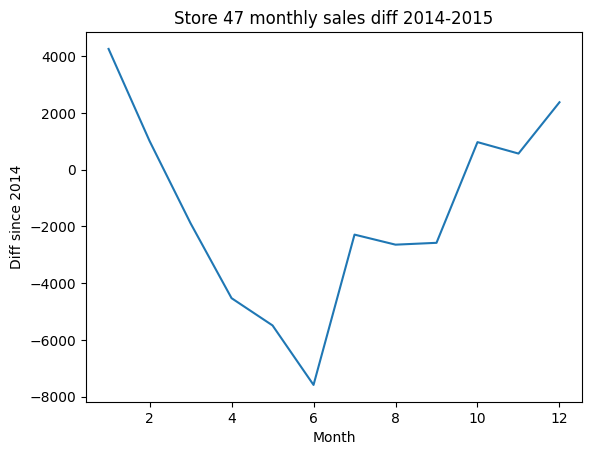

In [106]:
store_47_month_tx = transactions[transactions['store_nbr'] == 47].groupby([transactions['date'].dt.year, transactions['date'].dt.month])
store_47_month_sum_tx = store_47_month_tx['transactions'].agg('sum')
store_47_month_sum_tx.loc[2014:2015].head()
store_47_month_sum_tx.loc[2014:2015].diff(12).loc[2015].plot(xlabel='Month', ylabel='Diff since 2014', title='Store 47 monthly sales diff 2014-2015')

# Assignment 5: Resampling Time Series

Plot the monthly and yearly average oil prices.

In [107]:
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


<Axes: xlabel='date'>

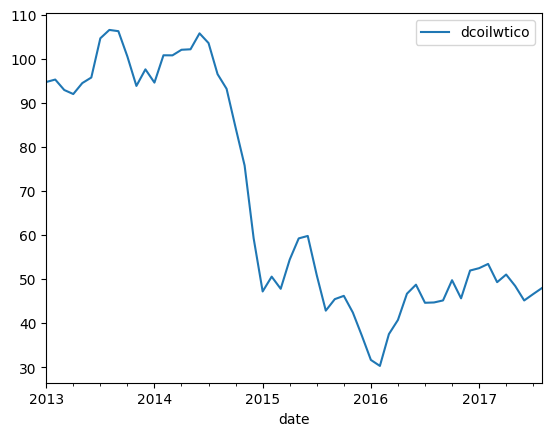

In [110]:
oil.resample('ME').mean().plot()

<Axes: xlabel='date'>

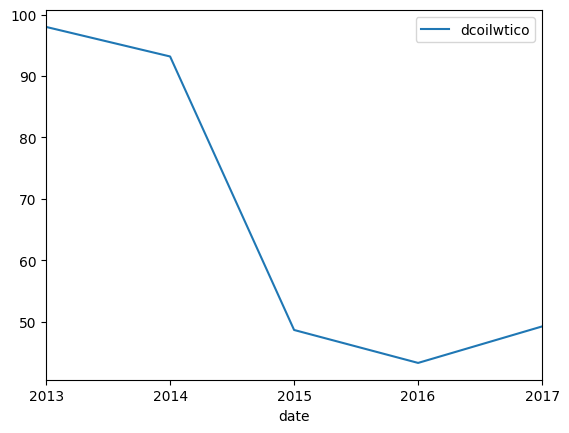

In [112]:
oil.resample('YE').mean().plot()

# Assignment 6: Rolling Averages

Plot the 90-day moving average for transactions for store 47.

This will help remove some of the noise from our series.

Thanks!


In [113]:
# recreate transactions_47 with date as index 

transactions_47 = (transactions
                   .loc[transactions["store_nbr"]==47, ["date", "transactions"]]
                   .set_index("date"))

transactions_47.head()

,transactions
date,
2013-01-02,4161
2013-01-03,3660
2013-01-04,3915
2013-01-05,4764
2013-01-06,4935


<Axes: xlabel='date'>

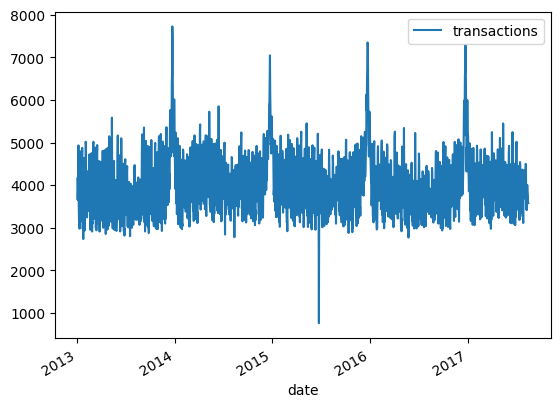

In [114]:
# original daily series for comparison

transactions_47.plot()

<Axes: title={'center': '90-day rolling average (Store 47)'}, xlabel='date', ylabel='Transactions'>

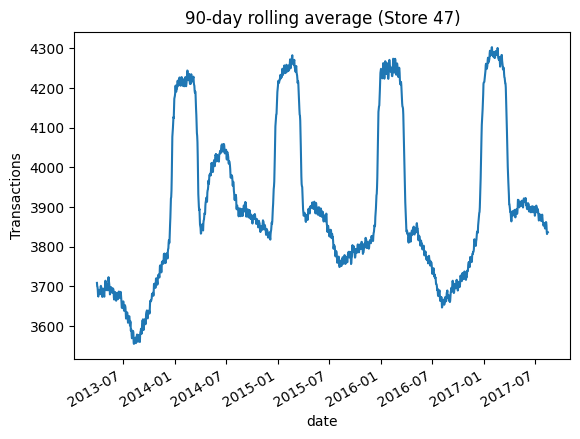

In [118]:
transactions_47.rolling(90).mean().plot(legend=False, title='90-day rolling average (Store 47)', ylabel='Transactions')